# Table2image

- Input = csv file contaning N saples each with d features
- Output = N images that mapping the corresponding samples

### Steps
    0. csv file in the form of Nxd matrix
    1. Perform normalization on that matrix
        a. min-max norm
        b. log norm
    2. Traspose the matrix (considere features-wise row). Obtain dxN matrix
    3. Perform Dimensionality reduction on the normalized matrix. Obatain the location of every feature in a cartesian plan
        a. TSNE
        b. PCA
    4. Find the minimum rectangle encopassing all the points and rotate
    5. For each saple, map the values from normalized matrix into the locations found earlier. Obtain an image describing the saple

---
### Step 0: .csv file in the form of Nxd matrix

The .csv is in the follwing form: <id, Label, [array of values]>

In [115]:
import csv
import pandas as pd 
import numpy as np


In [116]:
dataset_df = np.loadtxt("DATASET_origine_BUONO.csv", delimiter=",", skiprows=1)
dataset_df

array([[1.000e+00, 1.000e+00, 0.000e+00, ..., 0.000e+00, 1.200e-02,
        6.700e-02],
       [2.000e+00, 1.000e+00, 0.000e+00, ..., 0.000e+00, 6.000e-03,
        1.900e-02],
       [3.000e+00, 1.000e+00, 0.000e+00, ..., 0.000e+00, 6.000e-03,
        5.300e-02],
       ...,
       [1.215e+03, 6.000e+00, 0.000e+00, ..., 7.000e-03, 1.200e-02,
        4.900e-02],
       [1.216e+03, 6.000e+00, 0.000e+00, ..., 1.900e-02, 1.500e-02,
        5.500e-02],
       [1.217e+03, 6.000e+00, 0.000e+00, ..., 2.200e-02, 0.000e+00,
        0.000e+00]])

In [129]:
#This values are used to slice the dataframe in a feature-wise array and label-wise array
colStart_feature = 2
colEnd_feature = 75
colStart_label = 1
colEnd_label = 2


[[0.    0.    0.006 ... 0.    0.012 0.067]
 [0.    0.    0.1   ... 0.    0.006 0.019]
 [0.    0.02  0.017 ... 0.    0.006 0.053]
 ...
 [0.    0.067 0.679 ... 0.007 0.012 0.049]
 [0.    0.058 0.328 ... 0.019 0.015 0.055]
 [0.    0.075 0.124 ... 0.022 0.    0.   ]]

 X_traning shape:


(1217, 72)

In [131]:
X_traning = dataset_df[:, colStart_feature:colEnd_feature]

print(X_traning)
print("\n X_traning shape:")
X_traning.shape

[[0.    0.    0.006 ... 0.    0.012 0.067]
 [0.    0.    0.1   ... 0.    0.006 0.019]
 [0.    0.02  0.017 ... 0.    0.006 0.053]
 ...
 [0.    0.067 0.679 ... 0.007 0.012 0.049]
 [0.    0.058 0.328 ... 0.019 0.015 0.055]
 [0.    0.075 0.124 ... 0.022 0.    0.   ]]

 X_traning shape:


(1217, 72)

In [130]:
Y_traning = dataset_df[:, colStart_label:colEnd_label]

print(Y_traning)
print("\n Y_traning shape:")
Y_traning.shape

[[1.]
 [1.]
 [1.]
 ...
 [6.]
 [6.]
 [6.]]

 Y_traning shape:


(1217, 1)

---
### Step 1: Perform normalization on the matrix; obtain Nxd matrix with all values between 0 and 1

In [139]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler



In [151]:
norm_method = "MIN_MAX_NORM"

In [159]:
if(norm_method == "MIN_MAX_NORM"):
    print("Min-Max normalization used")
    scaler = MinMaxScaler()
    
    #NOT USE TRANSPOSE HERE <=============================
    #scaler.fit(X_traning_transpose)
    #X_traning_norm = scaler.transform(X_traning_transpose)
    
    scaler.fit(X_traning)
    X_traning_norm = scaler.transform(X_traning)
"""
elif (norm_method == "LOG_NORM"):
    print("Logarithm normalization used")
    X_traning_norm = np.log(X_traning)
"""

#check if all the values are between 0 and 1
print(X_traning_norm.min(axis=0))
print(X_traning_norm.max(axis=0))

print(X_traning_norm)

print("X_traning_norm shape:")
print(X_traning_norm.shape)

Min-Max normalization used
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[[0.         0.         0.00185099 ... 0.         0.03896104 0.03863899]
 [0.         0.         0.04534938 ... 0.         0.01948052 0.01095732]
 [0.         0.01512859 0.00694123 ... 0.         0.01948052 0.03056517]
 ...
 [0.         0.05068079 0.31328089 ... 0.01639344 0.03896104 0.02825836]
 [0.         0.04387292 0.15085609 ... 0.04449649 0.0487013  0.03171857]
 [0.         0.05673222 0.05645534 ... 0.05152225 0.         0.        ]]
X_traning_norm shape:
(1217, 72)


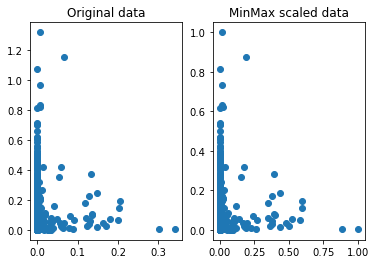

In [162]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1,2)
axes[0].scatter(X_traning[:,0], X_traning[:,1])
axes[0].set_title("Original data")
axes[1].scatter(X_traning_norm[:,0], X_traning_norm[:,1])
axes[1].set_title("MinMax scaled data")

plt.show()

---
### Step 2: Transpose the above matrix; obtain a feature-wise dxN matrix

In [160]:
X_traning_norm_transpose = X_traning_norm.T

print(X_traning_norm_transpose)
print("\n X_traning_norm_transpose shape:")
X_traning_norm_transpose.shape

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.01512859 ... 0.05068079 0.04387292 0.05673222]
 [0.00185099 0.04534938 0.00694123 ... 0.31328089 0.15085609 0.05645534]
 ...
 [0.         0.         0.         ... 0.01639344 0.04449649 0.05152225]
 [0.03896104 0.01948052 0.01948052 ... 0.03896104 0.0487013  0.        ]
 [0.03863899 0.01095732 0.03056517 ... 0.02825836 0.03171857 0.        ]]

 X_traning_transpose shape:


(72, 1217)

---
### Step 3: Perform a dimensionality reduction; obtain 2d coordinates of the features

In [165]:
from sklearn.manifold import TSNE
import seaborn as sn


In [166]:
reduction_method = "TSNE"

In [171]:
if(reduction_method == "TSNE"):
    print("TSNE used")
    TSNE_model = TSNE(n_components=2, random_state=0)
    active_location_pixel =  TSNE_model.fit_transform(X_traning_norm_transpose)
    active_location_pixel_df = pd.DataFrame(data=active_location_pixel, columns=("tsne-2d-one","tsne-2d-two"))

print(active_location_pixel_df)

TSNE used
    tsne-2d-one  tsne-2d-two
0    -41.268406     5.183746
1     24.991367   -20.767988
2     71.555634    21.052402
3      3.421207     2.822822
4     28.196262    16.305965
..          ...          ...
67   -11.508637     8.655437
68    46.563622     8.853287
69   -19.505644     6.217816
70    -6.233335    18.824059
71     1.206492    18.829227

[72 rows x 2 columns]


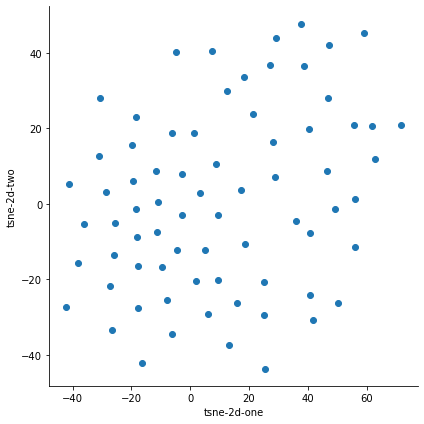

In [172]:
sn.FacetGrid(active_location_pixel_df, height=6).map(plt.scatter, "tsne-2d-one", "tsne-2d-two")
plt.show()